# Nama :Muhamad Abdulah Ridwan
# Nim  : 221315084

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df =  pd.read_csv("pelanggan.csv")

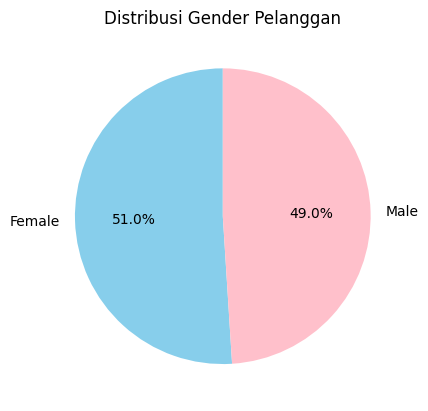

In [8]:
# Pie chart distribusi gender pelanggan
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        colors=['skyblue', 'pink'],
        startangle=90)
plt.title("Distribusi Gender Pelanggan")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12720\3145440497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


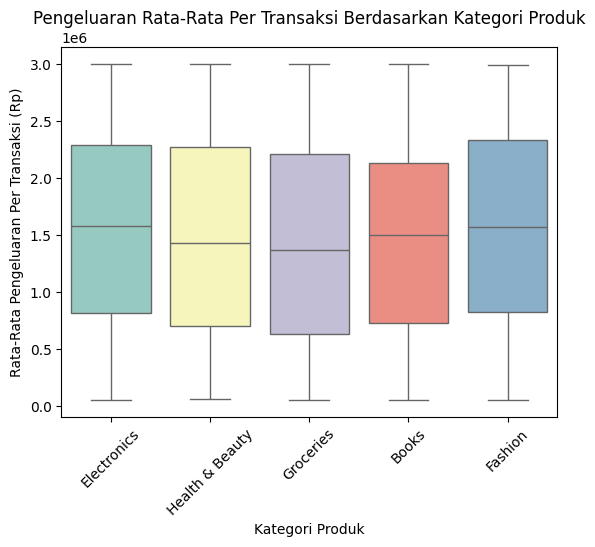

In [9]:
# Boxplot pengeluaran rata-rata per transaksi berdasarkan kategori produk
sns.boxplot(data=df,
            x='Preferred_Product_Category',
            y='Average_Spending_Per_Transaction',
            palette='Set3')
plt.title("Pengeluaran Rata-Rata Per Transaksi Berdasarkan Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Rata-Rata Pengeluaran Per Transaksi (Rp)")
plt.xticks(rotation=45)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12720\802428994.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,


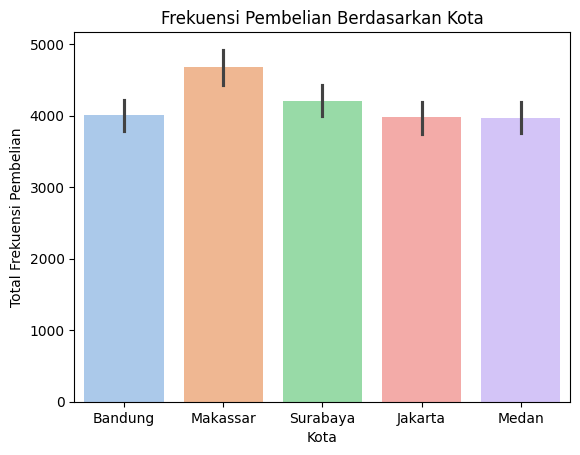

In [10]:
# Frekuensi pembelian berdasarkan kota
sns.barplot(data=df,
            x='City',
            y='Purchase_Frequency',
            estimator=sum,
            palette='pastel')
plt.title("Frekuensi Pembelian Berdasarkan Kota")
plt.xlabel("Kota")
plt.ylabel("Total Frekuensi Pembelian")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12720\1028776998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


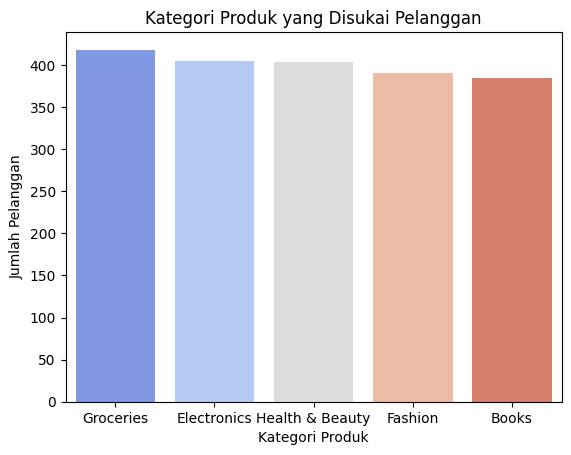

In [11]:
# Bar plot kategori produk yang disukai
sns.countplot(data=df,
              x='Preferred_Product_Category',
              order=df['Preferred_Product_Category'].value_counts().index,
              palette='coolwarm')
plt.title("Kategori Produk yang Disukai Pelanggan")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pelanggan")
plt.show()

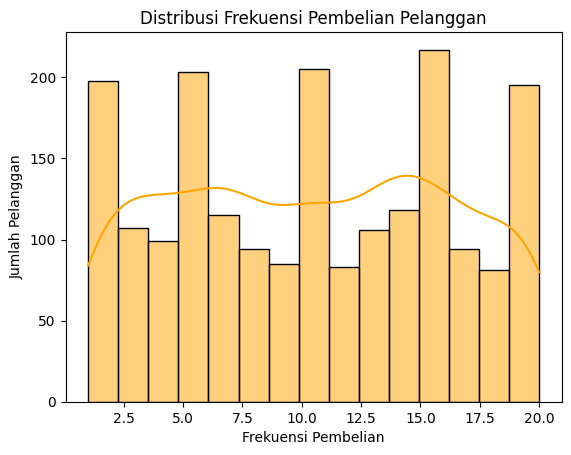

In [12]:
# Distribusi frekuensi pembelian pelanggan
sns.histplot(df['Purchase_Frequency'],
             kde=True,
             color='orange',
             bins=15)
plt.title("Distribusi Frekuensi Pembelian Pelanggan")
plt.xlabel("Frekuensi Pembelian")
plt.ylabel("Jumlah Pelanggan")
plt.show()

In [13]:
# Memilih fitur untuk clustering
features = ["Annual_Income", 
            "Purchase_Frequency", 
            "Average_Spending_Per_Transaction", 
            "Total_Spent"]

In [14]:
# Standarisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [15]:
# Menentukan jumlah cluster menggunakan metode Elbow
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

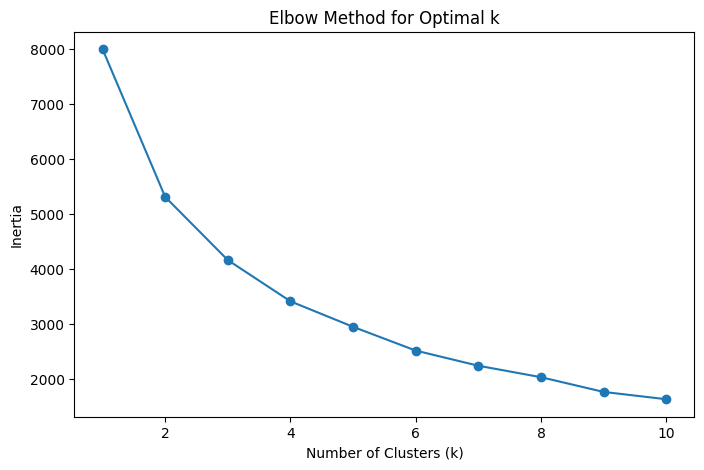

In [16]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [18]:
# Menggunakan jumlah cluster optimal
optimal_k = 4  # Berdasarkan elbow method (misalnya)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


In [19]:
# Mengurangi dimensi data untuk visualisasi
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)


In [20]:
# Warna untuk setiap cluster
colors = ['blue', 'green', 'red', 'purple']

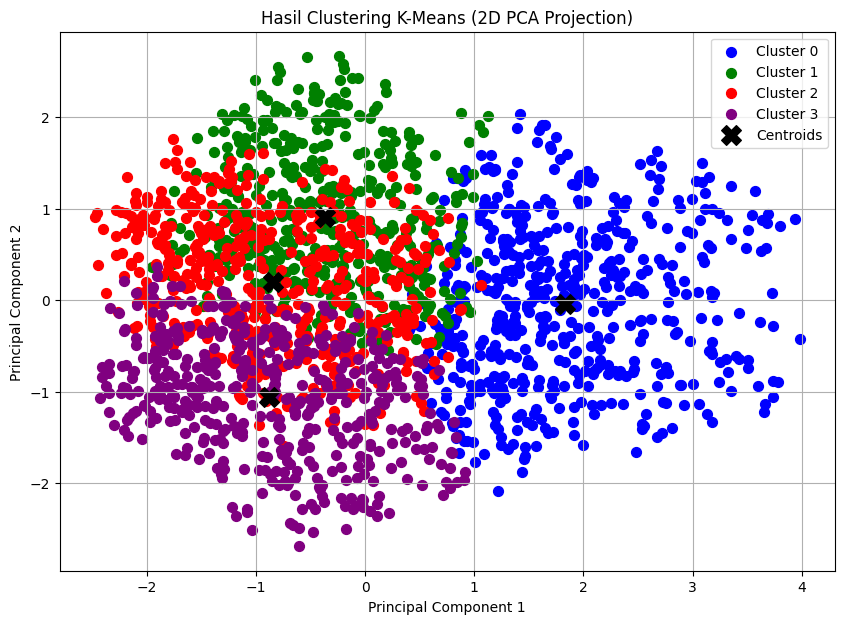

In [21]:
# Plot hasil clustering
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_points = reduced_features[df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0],
                cluster_points[:, 1],
                s=50,
                label=f'Cluster {cluster}',
                color=colors[cluster])

# Menambahkan centroid pada plot
centroids_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_reduced[:, 0],
            centroids_reduced[:, 1],
            s=200,
            c='black',
            marker='X',
            label='Centroids')

# Menambahkan detail plot
plt.title("Hasil Clustering K-Means (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()